In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
# from sklearn.model_selection import cross_validate
# from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectFromModel

from IPython.display import display
from subprocess import check_output
pd.options.display.max_columns = None
from collections import Counter
get_ipython().magic(u'matplotlib inline')

c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('C:\Users\SkunkWorks\Desktop\ML_Challenege\AnalyticsChallenge1-Train.csv')

## First summary of the data

In [3]:
df.shape

(1200, 35)

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27,No,Travel_Rarely,1103,Research & Development,14,3,Life Sciences,1,1244,1,Male,42,3,1,Research Scientist,1,Married,2235,14377,1,Y,Yes,14,3,4,80,2,9,3,2,9,7,6,8
1,31,Yes,Travel_Frequently,667,Sales,1,4,Life Sciences,1,1427,2,Female,50,1,1,Sales Representative,3,Single,1359,16154,1,Y,No,12,3,2,80,0,1,3,3,1,0,0,0
2,38,No,Travel_Rarely,345,Sales,10,2,Life Sciences,1,2041,1,Female,100,3,2,Sales Executive,4,Married,5343,5982,1,Y,No,11,3,3,80,1,10,1,3,10,7,1,9
3,40,Yes,Travel_Rarely,1329,Research & Development,7,3,Life Sciences,1,1649,1,Male,73,3,1,Laboratory Technician,1,Single,2166,3339,3,Y,Yes,14,3,2,80,0,10,3,1,4,2,0,3
4,33,No,Travel_Frequently,827,Research & Development,1,4,Other,1,998,3,Female,84,4,2,Healthcare Representative,2,Married,5488,20161,1,Y,Yes,13,3,1,80,1,6,2,3,6,5,1,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1195,37,Yes,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1033,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
1196,30,Yes,Travel_Rarely,1005,Research & Development,3,3,Technical Degree,1,297,4,Female,88,3,1,Research Scientist,1,Single,2657,8556,5,Y,Yes,11,3,3,80,0,8,5,3,5,2,0,4
1197,19,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,566,1,Male,52,2,1,Human Resources,4,Single,2564,18437,1,Y,No,12,3,3,80,0,1,3,4,1,0,0,0
1198,52,No,Travel_Rarely,319,Research & Development,3,3,Medical,1,543,4,Male,39,2,3,Manufacturing Director,3,Married,7969,19609,2,Y,Yes,14,3,3,80,0,28,4,3,5,4,0,4
1199,37,No,Travel_Rarely,161,Research & Development,10,3,Life Sciences,1,2017,3,Female,42,4,3,Research Director,4,Married,13744,15471,1,Y,Yes,25,4,1,80,1,16,2,3,16,11,6,8


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.797500,807.315833,9.141667,2.894167,1.0,1014.035833,2.708333,66.108333,2.747500,2.060000,2.740833,6486.90250,14441.413333,2.680000,15.156667,3.145000,2.705833,80.0,0.791667,11.361667,2.800833,2.753333,7.109167,4.270000,2.222500,4.170000
std,9.165779,401.864555,8.103785,1.033048,0.0,605.333838,1.096631,20.341536,0.715894,1.109396,1.090714,4718.58358,7152.650082,2.495888,3.599711,0.352248,1.093296,0.0,0.841935,7.806193,1.294564,0.721981,6.246447,3.664691,3.267806,3.610905
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.00000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,471.000000,2.000000,2.000000,1.0,475.500000,2.000000,48.750000,2.000000,1.000000,2.000000,2935.75000,8199.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,806.000000,7.000000,3.000000,1.0,1009.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4880.50000,14434.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1158.250000,14.000000,4.000000,1.0,1552.500000,4.000000,84.000000,3.000000,3.000000,4.000000,8197.75000,20701.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.250000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.00000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [8]:
df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1000,848,790,482,718,259,549,1200,854


In [9]:
df.isnull().values.any()

False

## Relationships between Education and Roles
Can create a new column for when the employee's education is different from their role.

Department doesn't seem to relate enough.

In [10]:
df.EducationField.value_counts()

Life Sciences       482
Medical             389
Marketing           128
Technical Degree    110
Other                70
Human Resources      21
Name: EducationField, dtype: int64

In [11]:
df.Department.value_counts()

Research & Development    790
Sales                     362
Human Resources            48
Name: Department, dtype: int64

In [12]:
df.JobLevel.value_counts()

1    446
2    436
3    176
4     84
5     58
Name: JobLevel, dtype: int64

In [13]:
df.JobRole.value_counts()

Sales Executive              259
Research Scientist           242
Laboratory Technician        214
Healthcare Representative    113
Manufacturing Director       111
Manager                       85
Sales Representative          71
Research Director             66
Human Resources               39
Name: JobRole, dtype: int64

In [14]:
df.Education.value_counts()

3    465
4    321
2    228
1    148
5     38
Name: Education, dtype: int64

In [15]:
cols = ['Education', 'EducationField', 'JobRole', 'JobLevel', 'Department']

In [16]:
df.loc[df['Education']==1, cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
9,1,Life Sciences,Healthcare Representative,2,Research & Development
18,1,Technical Degree,Manufacturing Director,2,Research & Development
21,1,Medical,Sales Executive,3,Sales
32,1,Life Sciences,Research Scientist,1,Research & Development
38,1,Medical,Healthcare Representative,2,Research & Development
44,1,Medical,Research Scientist,1,Research & Development
45,1,Life Sciences,Research Scientist,1,Research & Development
46,1,Other,Research Scientist,1,Research & Development
52,1,Medical,Research Scientist,1,Research & Development
53,1,Life Sciences,Sales Executive,2,Sales


In [17]:
df.loc[df['EducationField']=='Medical', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
10,3,Medical,Research Scientist,1,Research & Development
13,3,Medical,Manufacturing Director,2,Research & Development
14,3,Medical,Laboratory Technician,1,Research & Development
21,1,Medical,Sales Executive,3,Sales
23,2,Medical,Research Scientist,1,Research & Development
25,2,Medical,Healthcare Representative,2,Research & Development
26,3,Medical,Research Director,4,Research & Development
29,3,Medical,Laboratory Technician,1,Research & Development
38,1,Medical,Healthcare Representative,2,Research & Development
39,5,Medical,Research Scientist,2,Research & Development


In [18]:
df.loc[df['EducationField']=='Life Sciences', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
0,3,Life Sciences,Research Scientist,1,Research & Development
1,4,Life Sciences,Sales Representative,1,Sales
2,2,Life Sciences,Sales Executive,2,Sales
3,3,Life Sciences,Laboratory Technician,1,Research & Development
6,3,Life Sciences,Sales Executive,3,Sales
7,5,Life Sciences,Research Director,4,Research & Development
8,2,Life Sciences,Research Scientist,1,Research & Development
9,1,Life Sciences,Healthcare Representative,2,Research & Development
11,3,Life Sciences,Healthcare Representative,3,Research & Development
16,5,Life Sciences,Sales Executive,3,Sales


In [19]:
df.loc[df['EducationField']=='Technical Degree', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
17,4,Technical Degree,Laboratory Technician,1,Research & Development
18,1,Technical Degree,Manufacturing Director,2,Research & Development
58,5,Technical Degree,Research Scientist,2,Research & Development
67,2,Technical Degree,Laboratory Technician,1,Research & Development
68,4,Technical Degree,Healthcare Representative,3,Research & Development
80,3,Technical Degree,Laboratory Technician,1,Research & Development
83,3,Technical Degree,Research Scientist,1,Research & Development
100,3,Technical Degree,Research Scientist,1,Research & Development
102,4,Technical Degree,Research Scientist,1,Research & Development
125,3,Technical Degree,Laboratory Technician,1,Research & Development


In [20]:
df.loc[df['EducationField']=='Human Resources', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
33,3,Human Resources,Human Resources,3,Human Resources
34,5,Human Resources,Human Resources,2,Human Resources
76,1,Human Resources,Human Resources,2,Human Resources
117,4,Human Resources,Manager,5,Human Resources
212,3,Human Resources,Human Resources,2,Human Resources
216,2,Human Resources,Human Resources,1,Human Resources
348,3,Human Resources,Human Resources,2,Human Resources
478,3,Human Resources,Human Resources,1,Human Resources
559,3,Human Resources,Manager,5,Human Resources
714,4,Human Resources,Human Resources,2,Human Resources


In [21]:
df.loc[df['EducationField']=='Marketing', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
15,4,Marketing,Sales Executive,2,Sales
24,4,Marketing,Sales Executive,2,Sales
27,2,Marketing,Sales Executive,2,Sales
42,3,Marketing,Sales Executive,3,Sales
43,3,Marketing,Sales Representative,1,Sales
71,4,Marketing,Sales Executive,2,Sales
98,3,Marketing,Sales Executive,3,Sales
101,3,Marketing,Sales Executive,2,Sales
116,3,Marketing,Sales Representative,1,Sales
118,4,Marketing,Sales Executive,3,Sales


In [22]:
df.loc[df['EducationField']=='Other', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
4,4,Other,Healthcare Representative,2,Research & Development
5,4,Other,Laboratory Technician,1,Research & Development
12,3,Other,Manufacturing Director,3,Research & Development
46,1,Other,Research Scientist,1,Research & Development
61,3,Other,Healthcare Representative,3,Research & Development
94,2,Other,Research Scientist,1,Research & Development
99,4,Other,Healthcare Representative,2,Research & Development
120,3,Other,Sales Executive,2,Sales
121,3,Other,Research Director,3,Research & Development
126,3,Other,Manufacturing Director,2,Research & Development


In [23]:
df.loc[df['JobRole']=='Manager', cols].head(10)

,Education,EducationField,JobRole,JobLevel,Department
28,3,Life Sciences,Manager,5,Research & Development
41,4,Life Sciences,Manager,5,Research & Development
55,4,Life Sciences,Manager,4,Research & Development
66,2,Life Sciences,Manager,4,Research & Development
73,4,Medical,Manager,4,Research & Development
86,4,Medical,Manager,4,Research & Development
87,1,Life Sciences,Manager,4,Research & Development
91,2,Medical,Manager,4,Human Resources
117,4,Human Resources,Manager,5,Human Resources
190,3,Marketing,Manager,5,Sales


## Relationship between rates and income? What's the difference?
Can't seem to find a relationships between rates and income, what do the rates really mean? 

Why have rates when you have income data??

Too vague, remove rates entirely?

In [24]:
df[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']].describe()

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
count,1200.000000,1200.000000,1200.000000,1200.00000
mean,807.315833,66.108333,14441.413333,6486.90250
std,401.864555,20.341536,7152.650082,4718.58358
min,102.000000,30.000000,2094.000000,1009.00000
25%,471.000000,48.750000,8199.500000,2935.75000
50%,806.000000,66.000000,14434.000000,4880.50000
75%,1158.250000,84.000000,20701.500000,8197.75000
max,1499.000000,100.000000,26999.000000,19999.00000


In [25]:
df.loc[df['MonthlyIncome']<=1500.0 ,['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']].head()

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
1,667,50,16154,1359
62,287,73,13493,1051
63,1181,79,16102,1483
112,373,47,16901,1223
133,945,89,16019,1081


## Three types of martial statuses?
Seems like we can merge divorced with single

In [26]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

## How many new graduates?

In [27]:
# df.loc[df['TotalWorkingYears'] == 0]
df[df['TotalWorkingYears'] == 0].count()['Attrition']

10

## How many people started on a new role?

In [28]:
df[df['YearsInCurrentRole'] == 0].count()['Attrition']

197

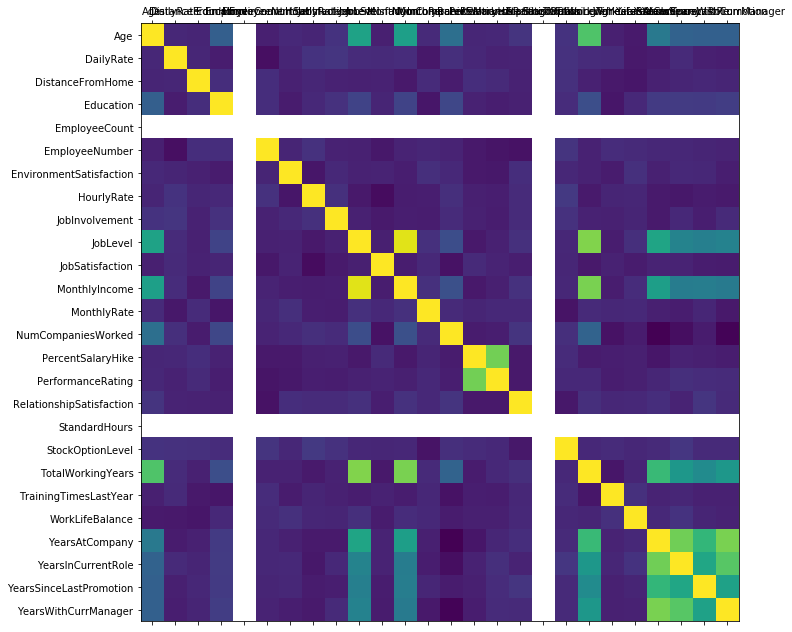

In [29]:
def plot_corr(df, size=11):
    '''
    Dark to Lighter color means stronger correlation
    Dark Blue -> DarkGreen -> Light Green -> Yellow
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df)

In [30]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.012622,0.001116,0.222434,NaN,-0.017139,0.014282,0.003969,0.049907,0.526704,-0.015015,0.513409,0.019586,0.295460,0.004602,0.010910,0.052394,NaN,0.047702,0.691783,-0.013805,-0.032509,0.334924,0.236817,0.229310,0.228998
DailyRate,0.012622,1.000000,0.005795,-0.022322,NaN,-0.065687,0.003548,0.048606,0.057820,0.024339,0.017228,0.026235,-0.041367,0.036770,0.011314,-0.008072,-0.002457,NaN,0.045024,0.023507,0.019869,-0.038553,-0.027913,0.018660,-0.014912,-0.021017
DistanceFromHome,0.001116,0.005795,1.000000,0.034370,NaN,0.033799,-0.012146,0.006985,-0.006911,-0.009388,-0.005750,-0.035341,0.025094,-0.030003,0.032061,0.018509,-0.004894,NaN,0.040390,-0.012940,-0.035309,-0.046053,-0.012910,0.000340,0.012225,0.000088
Education,0.222434,-0.022322,0.034370,1.000000,NaN,0.031450,-0.028007,0.016700,0.047289,0.112523,0.002284,0.108495,-0.045187,0.123682,-0.006976,-0.019677,-0.009127,NaN,0.028328,0.155956,-0.044462,0.014172,0.077920,0.080255,0.074923,0.090461
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.017139,-0.065687,0.033799,0.031450,NaN,1.000000,0.002000,0.045572,-0.008859,-0.010083,-0.042806,-0.004024,0.007105,-0.003174,-0.039224,-0.050130,-0.057273,NaN,0.054378,-0.006371,0.029905,0.019926,0.010732,0.010799,0.003269,-0.001879
EnvironmentSatisfaction,0.014282,0.003548,-0.012146,-0.028007,NaN,0.002000,1.000000,-0.044682,0.016599,-0.006855,-0.003980,-0.019916,0.038157,0.015541,-0.039333,-0.039404,0.032724,NaN,0.010012,-0.005594,-0.028615,0.042838,-0.009837,0.013386,0.012306,-0.018219
HourlyRate,0.003969,0.048606,0.006985,0.016700,NaN,0.045572,-0.044682,1.000000,0.042486,-0.038947,-0.077036,-0.025673,-0.018296,0.035641,-0.016657,-0.018257,0.021798,NaN,0.072760,-0.031168,0.003417,0.006251,-0.034167,-0.039876,-0.030626,-0.034633
JobInvolvement,0.049907,0.057820,-0.006911,0.047289,NaN,-0.008859,0.016599,0.042486,1.000000,-0.012413,-0.033675,-0.019475,-0.025373,0.023357,-0.012146,-0.023367,0.023302,NaN,0.046874,-0.006479,-0.011112,0.003647,-0.032065,0.014881,-0.021598,0.020168
JobLevel,0.526704,0.024339,-0.009388,0.112523,NaN,-0.010083,-0.006855,-0.038947,-0.012413,1.000000,-0.016777,0.949045,0.042951,0.150316,-0.038068,-0.011610,0.039319,NaN,0.011608,0.790960,-0.025354,0.036195,0.536436,0.386399,0.366248,0.379705


In [31]:
attr_yes = len(df.loc[df['Attrition'] == 'Yes'])
attr_no = len(df.loc[df['Attrition'] == 'No'])
print "Number of Yes cases: {0} ({1:2.2f}%)".format(attr_yes, (attr_yes / float(attr_yes + attr_no)) * 100)
print "Number of No cases: {0} ({1:2.2f}%)".format(attr_no, (attr_no / float(attr_yes + attr_no)) * 100)

Number of Yes cases: 200 (16.67%)
Number of No cases: 1000 (83.33%)


## Observations

1. Remove columns: EmployeeCount, StandardHours, EmployeeNumber, Over18, Department, DailyRate, HourlyRate, MonthlyRate, JobLevel

2. For MaritalStatus, merge Divorced into Single.

4. Normalize employee salaries into tax brackets based on 2017 with MartialStatus:
            
5. Remove nominal columns such as: Gender

6. Remove columns after merges: MartialStatus

7. EnvironmentSatisfaction and JobSatisfaction are similar, should remove one or both.

## Visualize the data

In [32]:
# Seperate the data to visualize these in plots
left_company = df[df.Attrition=='Yes']
with_company = df[df.Attrition=='No']

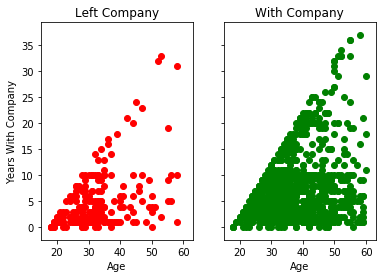

In [33]:
# Start with looking at age and years at company
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.scatter(left_company.Age, left_company.YearsAtCompany, color='r')
ax1.set_xlabel('Age')
ax1.set_ylabel('Years With Company')
ax1.set_title('Left Company')

ax2.scatter(with_company.Age, with_company.YearsAtCompany, color='g')
ax2.set_xlabel('Age')
ax2.set_title('With Company')

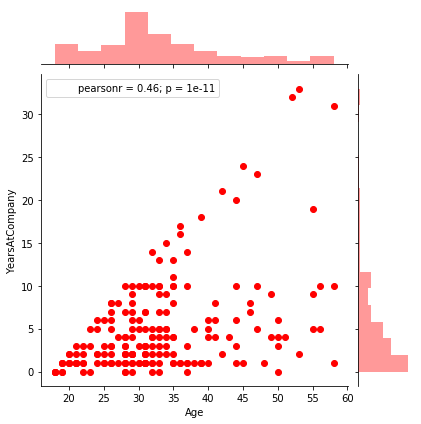

In [34]:
graph = sns.jointplot(left_company.Age, left_company.YearsAtCompany, color='r')

## Observations between age and years of service

Seems to be six peaks.
1. Largest age peak at 28-32 in their first two years at the company.
2. Second age peak at 32-35 between 2-4 years at the company.
3. Third age peak occurs twice, both at age 18-22 and 34-37 at 4-6 years at the company.
4. Peaks gradually slow down until 12 years at the company but occurs to a wide range of age groups.
5. Very few people who go past 12 years at the company leave.
6. Most people leave before age 40.

## Observation between age and years since promotion
Strong correlation between the previous graph.
Lets get service and promotion together.

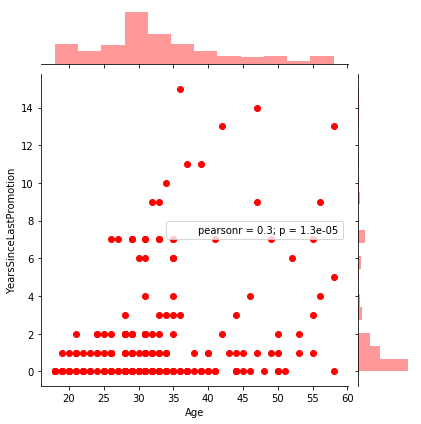

In [35]:
graph = sns.jointplot(left_company.Age, left_company.YearsSinceLastPromotion, color='r')

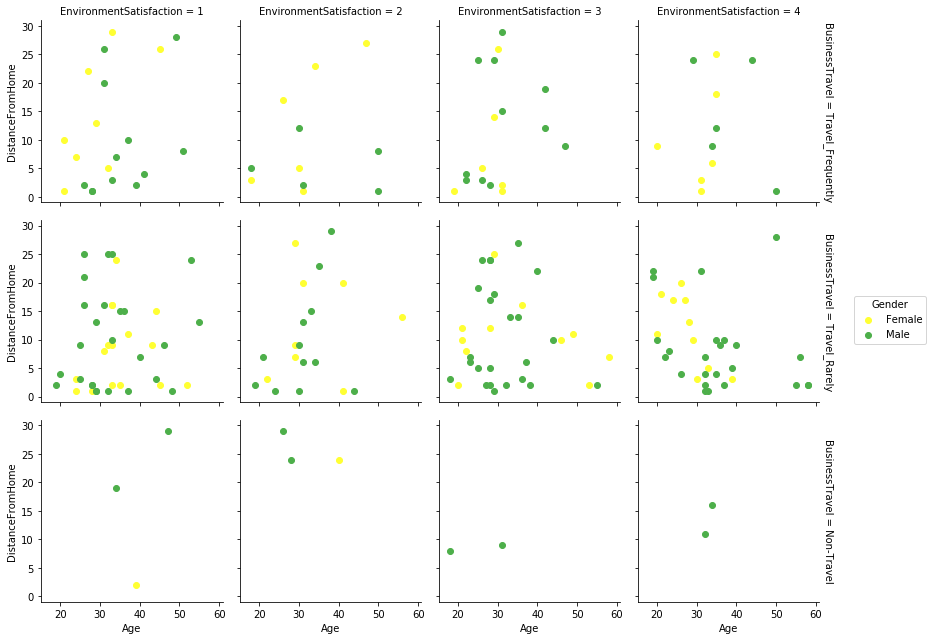

In [36]:
g = sns.FacetGrid(left_company, col='EnvironmentSatisfaction', row='BusinessTravel', palette='Set1_r', hue='Gender', margin_titles=True)
g = (g.map(plt.scatter, 'Age', 'DistanceFromHome').add_legend())

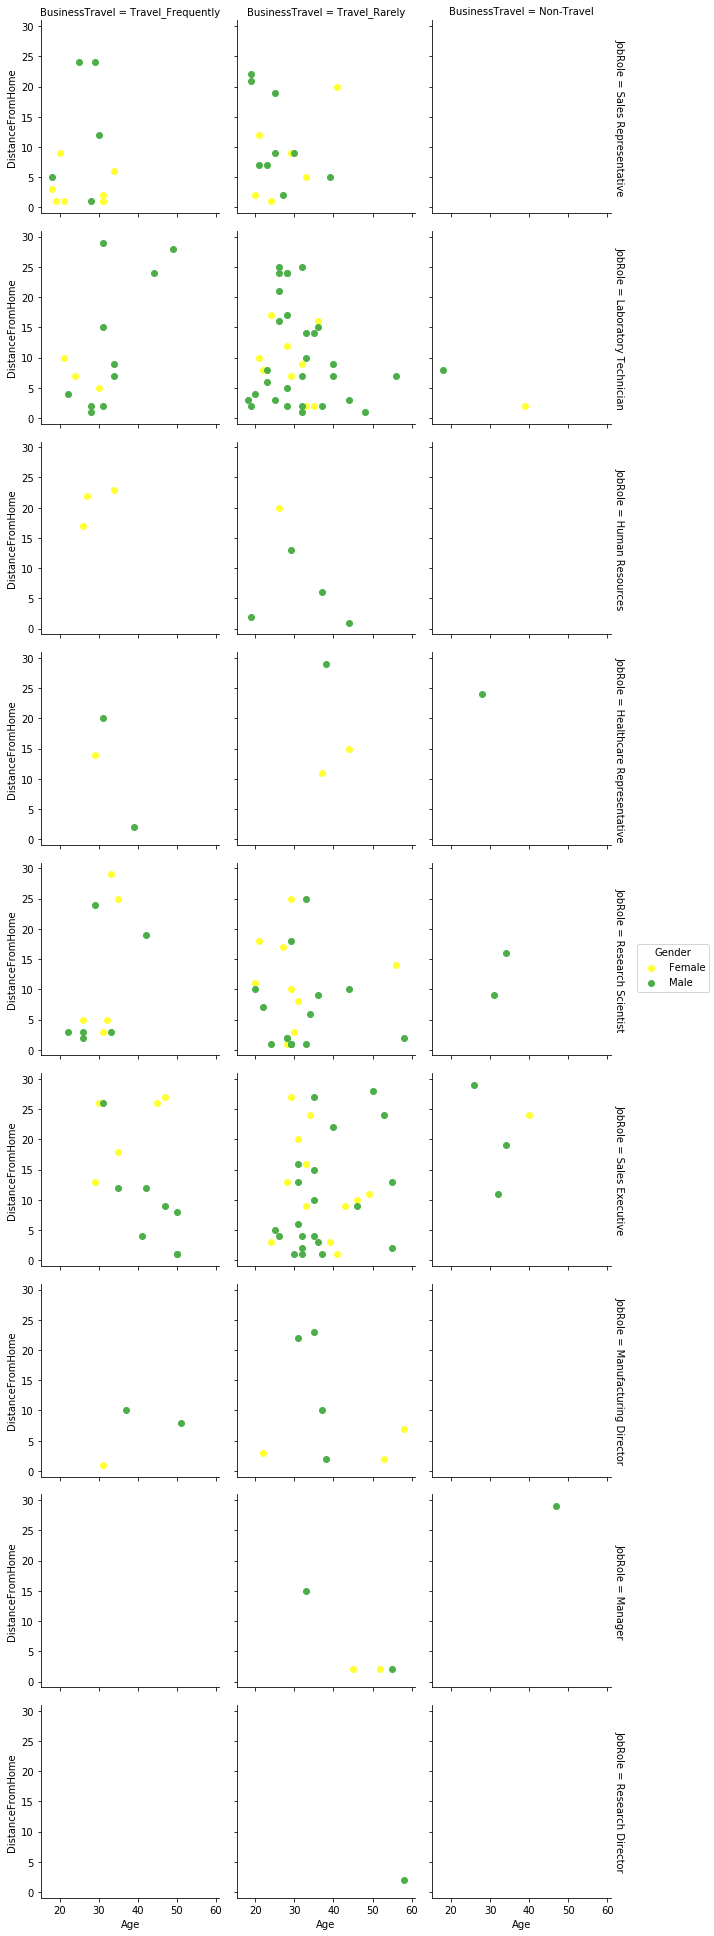

In [37]:
g = sns.FacetGrid(left_company, col='BusinessTravel', row='JobRole', palette='Set1_r', hue='Gender', margin_titles=True)
g = (g.map(plt.scatter, 'Age', 'DistanceFromHome').add_legend())

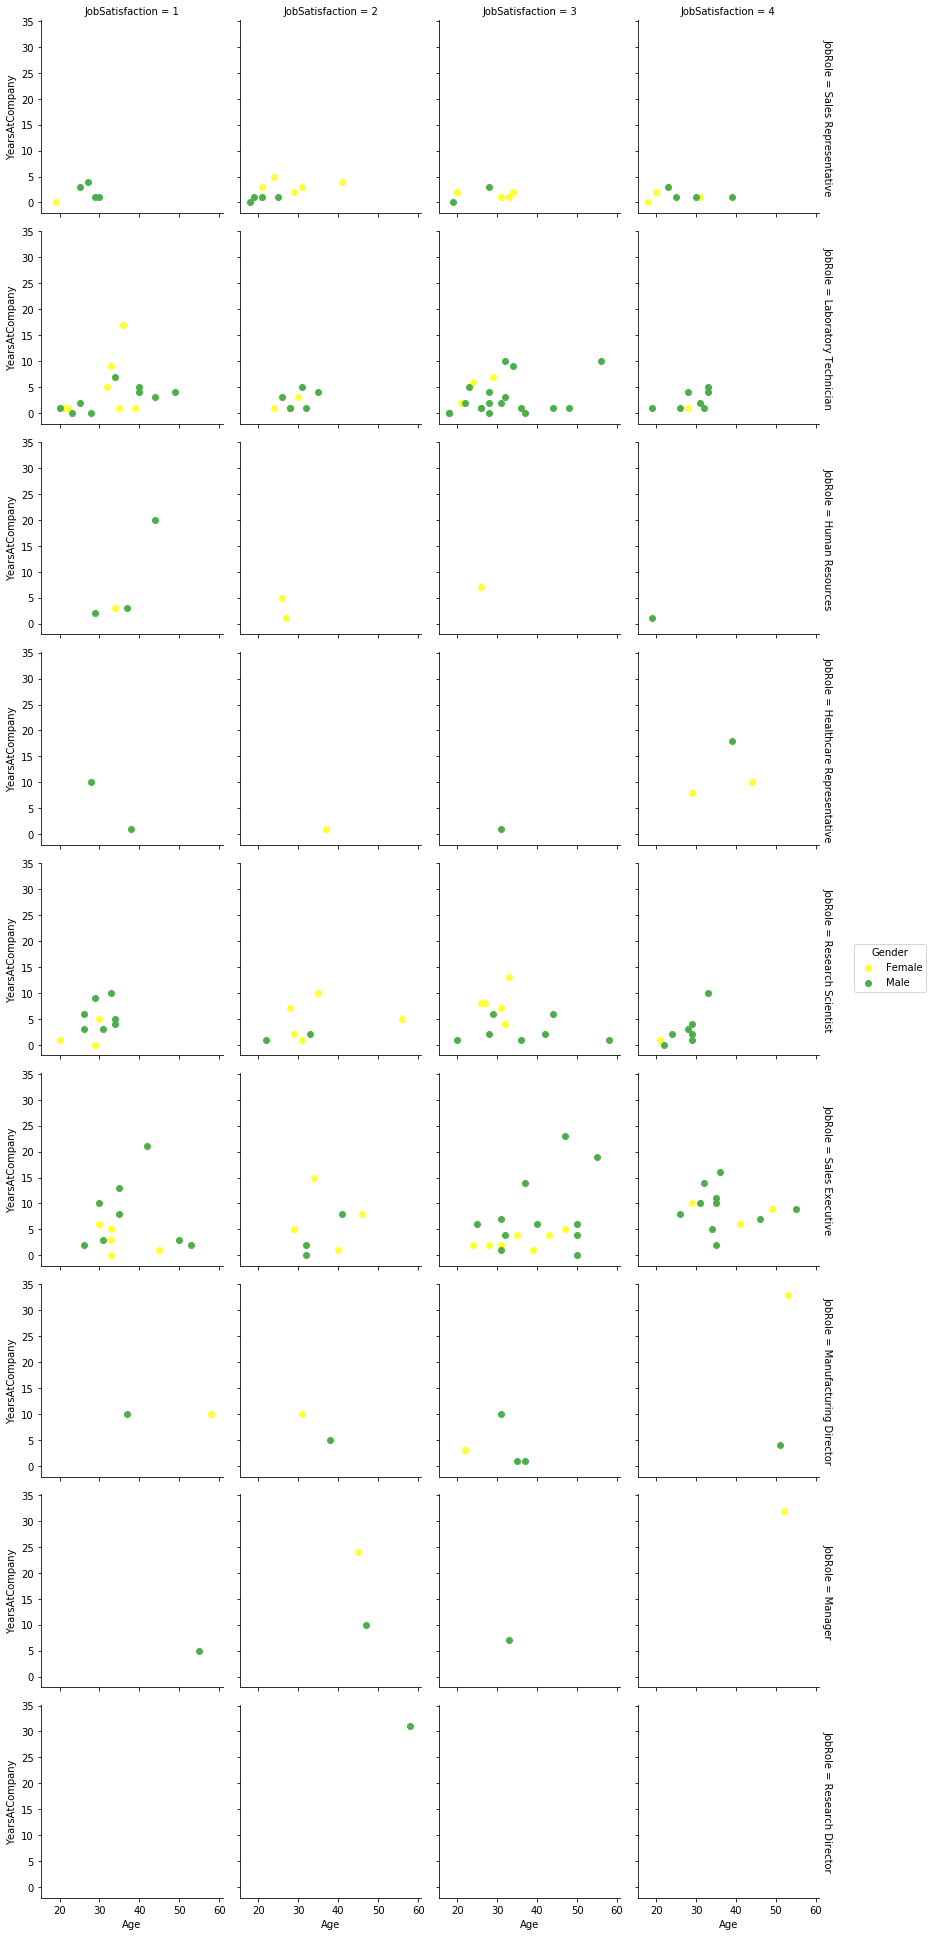

In [38]:
g = sns.FacetGrid(left_company, col='JobSatisfaction', row='JobRole', palette='Set1_r', hue='Gender', margin_titles=True)
g = (g.map(plt.scatter, 'Age', 'YearsAtCompany').add_legend())

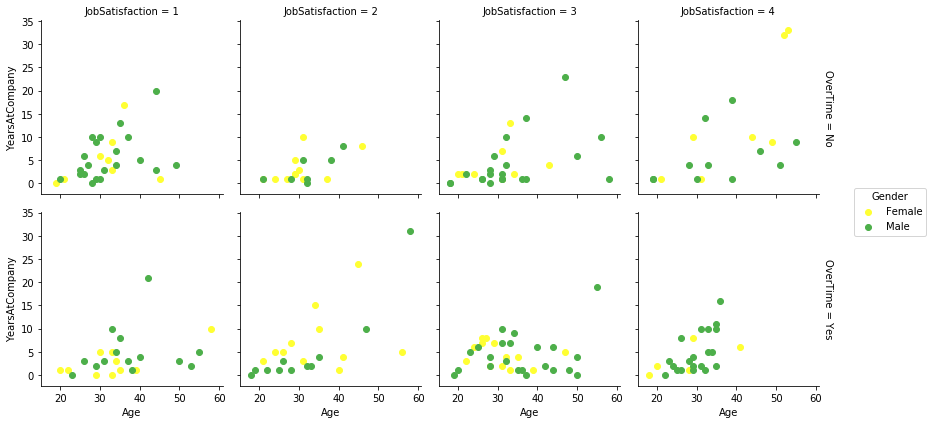

In [39]:
# Take a look at age, years at company, overTime, and department

g = sns.FacetGrid(left_company, col='JobSatisfaction', row='OverTime', palette='Set1_r', hue='Gender', margin_titles=True)
g = (g.map(plt.scatter, 'Age', 'YearsAtCompany').add_legend())

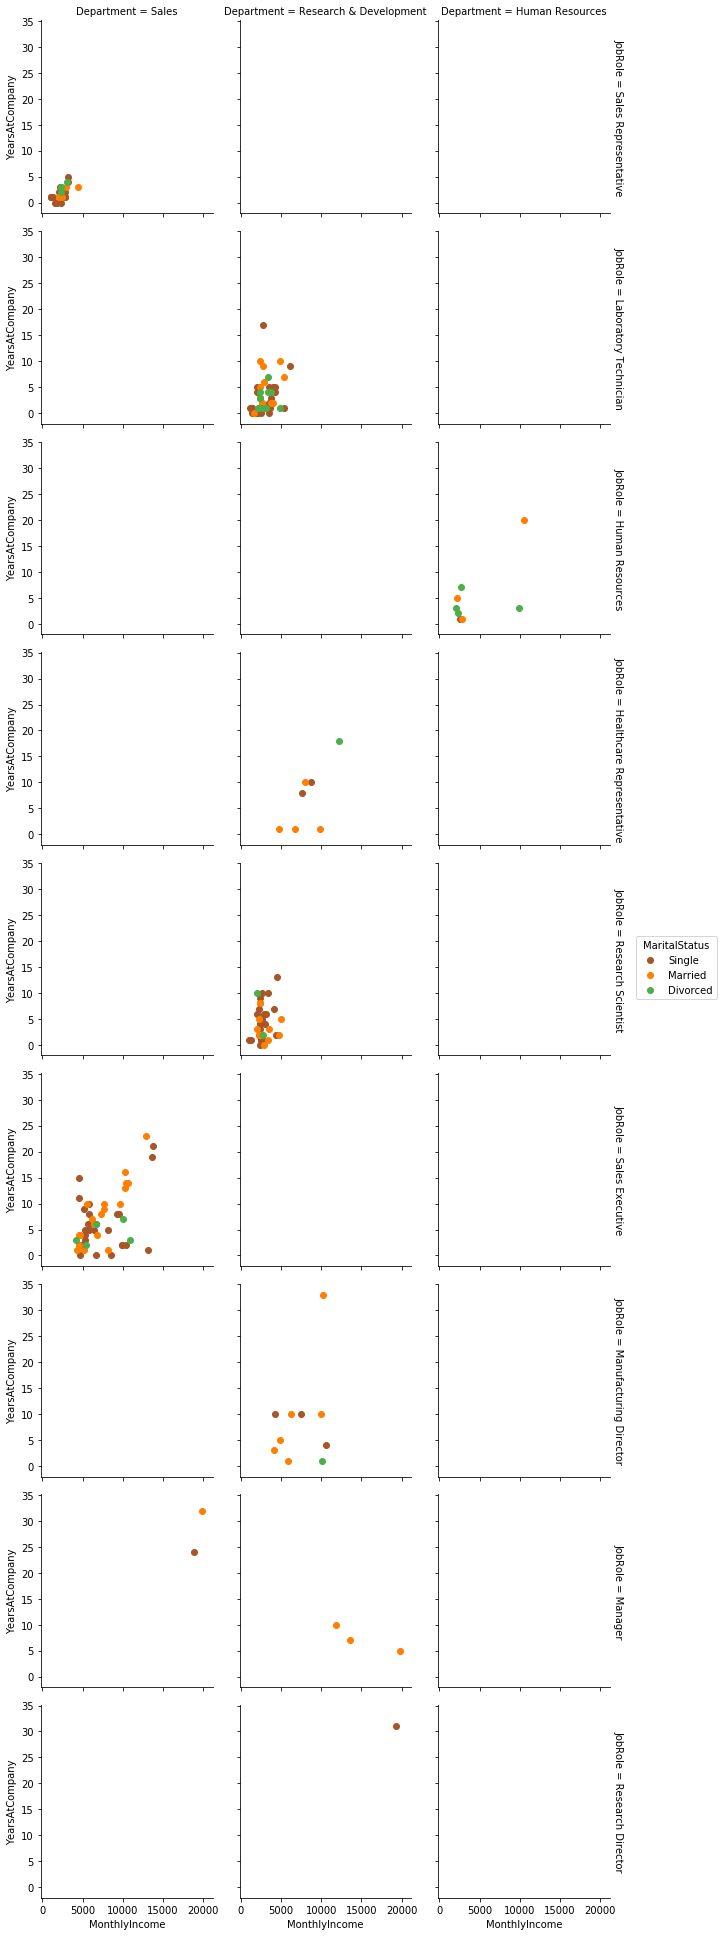

In [40]:
g = sns.FacetGrid(left_company, col='Department', row='JobRole', palette='Set1_r', hue='MaritalStatus', margin_titles=True)
g = (g.map(plt.scatter, 'MonthlyIncome', 'YearsAtCompany').add_legend())

Now we are on to something.
- There is pattern between monthly income, their role, years at the company, age, department

## Create a 2017 tax bracket column with martial status and monthly income

In [41]:
single_income_bracket = [[0, 9325],
                         [9325, 37950],
                         [37950, 91900],
                         [91900, 191650],
                         [191650, 999999]]

married_income_bracket = [[0, 18650],
                          [18650, 75900],
                          [75900, 153100],
                          [153101, 233350],
                          [233351, 999999]]

def convert_martial_income(martial_status, monthly_income):
    yearly_income = monthly_income * 12
    if martial_status == 'Married':
        for i, bracket in enumerate(married_income_bracket):
            if yearly_income >= bracket[0] and yearly_income < bracket[1]:
                return i+5
    for i, bracket in enumerate(single_income_bracket):
        if yearly_income >= bracket[0] and yearly_income < bracket[1]:
            return i
    return -1

df['IncomeBracket'] = map(convert_martial_income, df['MaritalStatus'], df['MonthlyIncome'])
# df[['MonthlyIncome', 'MaritalStatus', 'IncomeBracket']].head(40)
df['IncomeBracket'].value_counts()

6    341
2    287
1    200
7    126
3    117
8     69
4     47
9     11
5      2
Name: IncomeBracket, dtype: int64

In [42]:
df[['MonthlyIncome', 'MaritalStatus', 'IncomeBracket']].tail()

,MonthlyIncome,MaritalStatus,IncomeBracket
1195,4777,Married,6
1196,2657,Single,1
1197,2564,Single,1
1198,7969,Married,7
1199,13744,Married,8


In [43]:
# Check lowest income
df.loc[df['MonthlyIncome']<=1100.0 ,['MonthlyIncome', 'MaritalStatus', 'IncomeBracket']].head()

,MonthlyIncome,MaritalStatus,IncomeBracket
62,1051,Single,1
133,1081,Single,1
695,1009,Single,1
757,1052,Married,5
781,1091,Single,1


In [44]:
# Check highest income
df.loc[df['MonthlyIncome']>=19700,['MonthlyIncome', 'MaritalStatus', 'IncomeBracket']].head()

,MonthlyIncome,MaritalStatus,IncomeBracket
41,19999,Married,9
553,19973,Divorced,4
693,19847,Divorced,4
738,19845,Married,9
887,19740,Married,9


In [45]:
# Error check
df.loc[df['IncomeBracket']<0,['MonthlyIncome', 'MaritalStatus', 'IncomeBracket']].head()

,MonthlyIncome,MaritalStatus,IncomeBracket


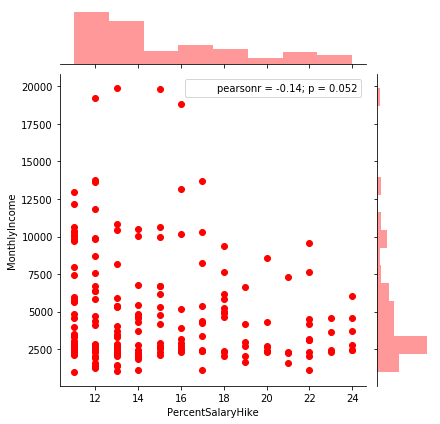

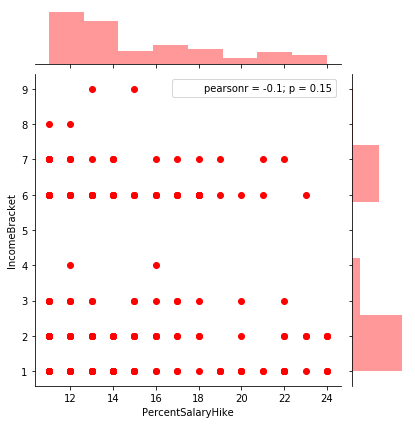

In [46]:
left_company = df[df.Attrition=='Yes']
graph = sns.jointplot(left_company.PercentSalaryHike, left_company.MonthlyIncome, color='r')
graph = sns.jointplot(left_company.PercentSalaryHike, left_company.IncomeBracket, color='r')

## Normalize columns into numerical types

In [47]:
df.BusinessTravel = df.BusinessTravel.map({'Travel_Frequently':2, 'Travel_Rarely':1, 'Non-Travel':0})

df.Attrition = df.Attrition.map({'No':0, 'Yes':1})

df.EducationField = df.EducationField.map({'Life Sciences':0, 
                                           'Medical':1, 
                                           'Marketing':2, 
                                           'Technical Degree':3,
                                           'Other':4,
                                           'Human Resources':5})

df.JobRole = df.JobRole.map({'Sales Executive':0, 
                             'Research Scientist':1, 
                             'Laboratory Technician':2, 
                             'Healthcare Representative':3,
                             'Manufacturing Director':4,
                             'Manager':5,
                             'Sales Representative':6,
                             'Research Director':7,
                             'Human Resources':8})

df.OverTime = df.OverTime.map({'Yes':1,
                               'No':0})

df.Gender = df.Gender.map({'Male':0,
                           'Female':1})

df.MaritalStatus = df.MaritalStatus.map({'Single':0,
                                         'Married':1,
                                         'Divorced':2})

df.Department = df.Department.map({'Research & Development':0,
                                   'Sales':1,
                                   'Human Resources':2})

## Last checks

In [48]:
df.columns[df.isnull().any()].tolist()

[]

In [49]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBracket
0,27,0,1,1103,0,14,3,0,1,1244,1,0,42,3,1,1,1,1,2235,14377,1,Y,1,14,3,4,80,2,9,3,2,9,7,6,8,6
1,31,1,2,667,1,1,4,0,1,1427,2,1,50,1,1,6,3,0,1359,16154,1,Y,0,12,3,2,80,0,1,3,3,1,0,0,0,1
2,38,0,1,345,1,10,2,0,1,2041,1,1,100,3,2,0,4,1,5343,5982,1,Y,0,11,3,3,80,1,10,1,3,10,7,1,9,6
3,40,1,1,1329,0,7,3,0,1,1649,1,0,73,3,1,2,1,0,2166,3339,3,Y,1,14,3,2,80,0,10,3,1,4,2,0,3,1
4,33,0,2,827,0,1,4,4,1,998,3,1,84,4,2,3,2,1,5488,20161,1,Y,1,13,3,1,80,1,6,2,3,6,5,1,2,6
5,52,0,1,258,0,8,4,4,1,1409,3,1,54,3,1,2,1,1,2950,17363,9,Y,0,13,3,3,80,0,12,2,1,5,4,0,4,6
6,27,0,2,994,1,8,3,0,1,56,4,0,37,3,3,0,3,0,8726,2975,1,Y,0,15,3,4,80,0,9,0,3,9,8,1,7,3
7,42,0,1,810,0,23,5,0,1,468,1,1,44,3,4,7,4,0,15992,15901,2,Y,0,14,3,2,80,0,16,2,3,1,0,0,0,4
8,28,0,1,1117,0,8,2,0,1,395,4,1,66,3,1,1,4,0,3310,4488,1,Y,0,21,4,4,80,0,5,3,3,5,3,0,2,2
9,29,0,1,726,0,29,1,0,1,1859,4,0,93,1,2,3,3,2,6384,21143,8,Y,0,17,3,4,80,2,11,3,3,7,0,1,6,2


## Prepare the training and test data

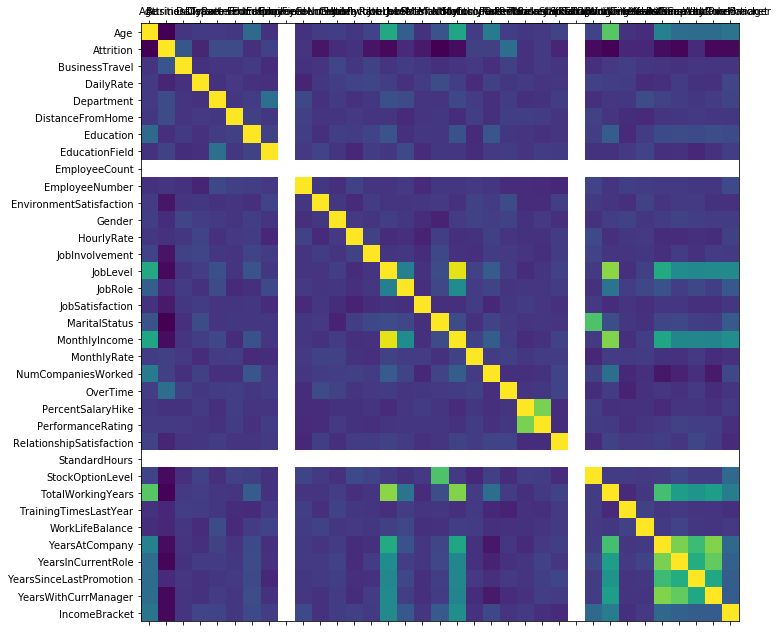

In [50]:
plot_corr(df)

In [51]:
# Gender are nominal, so don't need to convert to ordinal values
# dummy_cols = ['Gender', 'BusinessTravel', 'OverTime']
# df = pd.get_dummies(df, columns=dummy_cols)

#Separate the label
# label = df.Attrition
# df = df.drop('Attrition', axis=1)

## Feature selection

In [52]:
employee_nums = df['EmployeeNumber']
drop_cols = ['StandardHours', 'Over18', 'EmployeeCount', 'Attrition', 'EmployeeNumber']
label_col = ['Attrition']

df2 = df.drop(drop_cols, axis=1)

X = df2[:].values
y = df[label_col].values.ravel()

rdm = 7

In [53]:
#Suggestion of the top X features to include
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
rfe_model = LogisticRegressionCV(n_jobs=-1, random_state=rdm, Cs=3, cv=10, refit=True, class_weight='balanced')
rfe = RFE(rfe_model, 10)
rfe = rfe.fit(X, y)

In [54]:
# print rfe.support_
# print rfe.ranking_
rfe_matrix = [[df2.columns.values[i], rfe.ranking_[i]] for i in range(len(df2.columns.values))]
rfe_matrix.sort(key=lambda x: x[1])
print(np.matrix(rfe_matrix))

[['BusinessTravel' '1']
 ['Department' '1']
 ['EnvironmentSatisfaction' '1']
 ['Gender' '1']
 ['JobInvolvement' '1']
 ['JobLevel' '1']
 ['JobSatisfaction' '1']
 ['MaritalStatus' '1']
 ['OverTime' '1']
 ['WorkLifeBalance' '1']
 ['RelationshipSatisfaction' '2']
 ['PerformanceRating' '3']
 ['TrainingTimesLastYear' '4']
 ['YearsWithCurrManager' '5']
 ['YearsSinceLastPromotion' '6']
 ['EducationField' '7']
 ['YearsInCurrentRole' '8']
 ['NumCompaniesWorked' '9']
 ['PercentSalaryHike' '10']
 ['IncomeBracket' '11']
 ['YearsAtCompany' '12']
 ['JobRole' '13']
 ['Education' '14']
 ['Age' '15']
 ['StockOptionLevel' '16']
 ['TotalWorkingYears' '17']
 ['DistanceFromHome' '18']
 ['HourlyRate' '19']
 ['MonthlyIncome' '20']
 ['DailyRate' '21']
 ['MonthlyRate' '22']]


In [55]:
#Second Suggestion
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state=rdm)
etc_model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [56]:
etc_matrix = [[df2.columns.values[i], etc_model.feature_importances_[i]] for i in range(len(etc_model.feature_importances_))]
etc_matrix.sort(key=lambda x: x[1])
print(np.matrix(etc_matrix))

[['PerformanceRating' '0.0138361704137']
 ['Department' '0.0216556851832']
 ['YearsInCurrentRole' '0.0223715949165']
 ['Gender' '0.0230067493165']
 ['JobLevel' '0.0258776085704']
 ['JobSatisfaction' '0.0260432200088']
 ['YearsAtCompany' '0.0273782314126']
 ['Education' '0.0276940588571']
 ['WorkLifeBalance' '0.0277651947396']
 ['DistanceFromHome' '0.0280346163023']
 ['PercentSalaryHike' '0.0281123367506']
 ['DailyRate' '0.0305283235641']
 ['NumCompaniesWorked' '0.030584960405']
 ['BusinessTravel' '0.0307634833009']
 ['MaritalStatus' '0.0311204339395']
 ['RelationshipSatisfaction' '0.031358427448']
 ['TrainingTimesLastYear' '0.0316189365943']
 ['YearsSinceLastPromotion' '0.0317122149223']
 ['TotalWorkingYears' '0.0323775340167']
 ['EducationField' '0.0323932836111']
 ['JobInvolvement' '0.0326401436356']
 ['JobRole' '0.033491747517']
 ['HourlyRate' '0.0350953215008']
 ['MonthlyRate' '0.0359121609766']
 ['StockOptionLevel' '0.0372183762407']
 ['Age' '0.0387974902167']
 ['EnvironmentSatisf

In [57]:
feature_cols = [
#                 'Age', 
                'BusinessTravel', 
                'Department', 
#                 'Education',
#                 'OverTime',
#                 'DistanceFromHome',
#                 'Gender',
                'JobRole',
#                 'JobLevel',
#                 'JobInvolvement',
#                 'MaritalStatus',
                'YearsAtCompany',
                'MonthlyIncome',
#                 'YearsInCurrentRole',
#                 'YearsWithCurrManager',
#                 'TotalWorkingYears',
#                 'StockOptionLevel',
#                 'WorkLifeBalance',
#                 'JobSatisfaction',
#                 'EnvironmentSatisfaction',
#                 'PerformanceRating',
#                 'RelationshipSatisfaction',
#                 'YearsSinceLastPromotion',
#                 'IncomeBracket',
                ]

# df3 = df2[feature_cols]

# X = df3[:].values
# y = df[label_col].values.ravel()

In [58]:
# from sklearn.svm import LinearSVC
# m = SelectFromModel(LinearSVC(C=0.1, penalty='l2', dual=False, random_state=rdm))

In [59]:
# from sklearn.linear_model import LassoCV
# m = SelectFromModel(LassoCV(n_jobs=-1, random_state=rdm))

In [60]:
# print np.shape(X)
# # fit = m.fit(X, y)
# # X = m.transform(X)
# X = m.fit_transform(X, y)
# # print fit.support_
# print np.shape(X)

## Split and validate training and test data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rdm)

In [62]:
# Verify training and test results are split evenly
print 'Original:'
print len(df.loc[df['Attrition'] == 1])
print len(df.loc[df['Attrition'] == 0])
print 'For training:'
print len(y_train[y_train[:] == 1])
print len(y_train[y_train[:] == 0])
print 'For testing:'
print len(y_test[y_test[:] == 1])
print len(y_test[y_test[:] == 0])

Original:
200
1000
For training:
149
691
For testing:
51
309


## K Nearest Neighbors

In [63]:
# k_range = range(1,31)
# leaf_range = range(1,50)
# weight_options = ['uniform', 'distance']
# algo_options = ['ball_tree', 'kd_tree', 'brute']

# param_grid = dict(n_neighbors=k_range, 
#                   leaf_size=leaf_range,
#                   weights=weight_options,
#                   algorithm=algo_options)

# grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
# grid.fit(X_train, y_train)

# print grid.best_score_
# print grid.best_params_
# print grid.best_estimator_

In [64]:
k_range = range(1,31)
leaf_range = range(1,50)
weight_options = ['uniform', 'distance']
algo_options = ['ball_tree', 'kd_tree', 'brute']

param_dist = dict(n_neighbors=k_range,
                  leaf_size=leaf_range,
                  weights=weight_options,
                  algorithm=algo_options)

knn_model = KNeighborsClassifier()
knn_rsc = RandomizedSearchCV(knn_model, param_dist, cv=10, scoring='accuracy', n_iter=1000, random_state=rdm, n_jobs=-1)
knn_rsc.fit(X, y)

print knn_rsc.best_score_
print knn_rsc.best_params_
print knn_rsc.best_estimator_

0.835
{'n_neighbors': 20, 'weights': 'uniform', 'leaf_size': 14, 'algorithm': 'kd_tree'}
KNeighborsClassifier(algorithm='kd_tree', leaf_size=14, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


In [65]:
knn_model = knn_rsc.best_estimator_
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=14, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

## SVC

In [66]:
c_range = []
for i in xrange(11):
    for j in xrange(10):
        val = i + (j * 0.1)
        c_range.append(val)
del c_range[0]

In [67]:
algo_options = ['linear', 'poly', 'rbf', 'sigmoid']
p_range = [1.0, 2.0, 3.0, 4.0, 5.0]

param_dist = dict(C=p_range)
#                   kernel=algo_options)

svc_model = SVC(random_state=rdm)

# svc_rsc = RandomizedSearchCV(svc_model, param_dist, cv=10, scoring='accuracy', n_iter=8, random_state=rdm, n_jobs=-1)
# svc_rsc.fit(X, y)

svc_rsc = GridSearchCV(svc_model, param_dist, cv=10, scoring='accuracy', n_jobs=-1)
svc_rsc.fit(X, y)

# svc_model = SVC(C=1, kernel='rbf', random_state=rdm)
# scoring = ['precision_macro', 'recall_macro']
# scores = cross_validate(svc_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)
# pprint(scores)
# svc_model.fit(X_train, y_train)
# svc_score = svc_model.score(X_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [68]:
print svc_rsc.best_score_
print svc_rsc.best_params_
print svc_rsc.best_estimator_

svc_model = svc_rsc.best_estimator_
svc_model.fit(X_train, y_train)

0.831666666667
{'C': 1.0}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=7, shrinking=True,
  tol=0.001, verbose=False)

## Random Forest Classifier

In [69]:
crit_options = ['gini', 'entropy']
m_feat_options = ['sqrt', 'log2']
depth_range = range(1, 30)
split_options = range(2,4)
oob_options = ['True', 'False']
est_range = range(10, 1000)

param_dist = dict(criterion=crit_options,
                  max_features=m_feat_options,
                  max_depth=depth_range,
                  min_samples_split=split_options,
                  oob_score=oob_options,
                  n_estimators=est_range)

rf_model = RandomForestClassifier(n_jobs=-1, random_state=rdm)
rf_rsc = RandomizedSearchCV(rf_model, param_dist, cv=10, scoring='accuracy', n_iter=25, random_state=rdm, n_jobs=-1)
rf_rsc.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75..., 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
          pre_dispatch='2*n_jobs', random_state=7, re

In [70]:
print rf_rsc.best_score_
print rf_rsc.best_params_
print rf_rsc.best_estimator_

rf_model = rf_rsc.best_estimator_
rf_model.random_state = rdm
rf_model.fit(X_train, y_train)

0.839166666667
{'oob_score': 'True', 'n_estimators': 817, 'max_features': 'sqrt', 'criterion': 'gini', 'min_samples_split': 3, 'max_depth': 4}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=817, n_jobs=-1,
            oob_score='True', random_state=7, verbose=0, warm_start=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=817, n_jobs=-1,
            oob_score='True', random_state=7, verbose=0, warm_start=False)

## Naive Bayes

In [71]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# nb_score = nb_model.score(X_test, y_test)

GaussianNB(priors=None)

## Logistic Regression

In [72]:
# Logistic Regression
# lr_model = LogisticRegression(C=0.5, random_state=rdm)
penalty_options = ['l1', 'l2']

param_dist = dict(C=c_range,
                  penalty=penalty_options)

lr_model = LogisticRegression(n_jobs=-1, random_state=rdm)
lr_rsc = GridSearchCV(lr_model, param_dist, cv=10, scoring='accuracy', n_jobs=-1)
# lr_rsc = RandomizedSearchCV(lr_model, param_dist, cv=10, scoring='accuracy', n_iter=25, random_state=rdm, n_jobs=-1)
lr_rsc.fit(X, y)

# lr_model = LogisticRegressionCV(n_jobs=-1, random_state=rdm, Cs=3, cv=10, refit=True, class_weight='balanced')
# lr_model.fit(X_train, y_train)

c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4...9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [73]:
print lr_rsc.best_score_
print lr_rsc.best_params_
print lr_rsc.best_estimator_

lr_model = lr_rsc.best_estimator_
lr_model.random_state = rdm
lr_model.fit(X_train, y_train)

0.834166666667
{'penalty': 'l1', 'C': 0.4}
LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=7, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Logistic Regression CV

In [74]:
lrcv_model = LogisticRegressionCV(n_jobs=-1, random_state=rdm, Cs=3, cv=10, refit=True, class_weight='balanced')
lrcv_model.fit(X_train, y_train)
lrcv_model.fit(X, y)

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=7,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

## Analyze the results

In [75]:
knn_predict_train = knn_model.predict(X_train)
svc_predict_train = svc_model.predict(X_train)
rf_predict_train = rf_model.predict(X_train)
nb_predict_train = nb_model.predict(X_train)
lr_predict_train = lr_model.predict(X_train)
lrcv_predict_train = lrcv_model.predict(X_train)

print "KNN training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, knn_predict_train))
print "SVC training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, svc_predict_train))
print "RF training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train))
print "NB training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train))
print "LR training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train))
print "LRCV training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lrcv_predict_train))

KNN training accuracy: 0.8262
SVC training accuracy: 0.9869
RF training accuracy: 0.8369
NB training accuracy: 0.8179
LR training accuracy: 0.8226
LRCV training accuracy: 0.5345


In [76]:
knn_predict_test = knn_model.predict(X_test)
svc_predict_test = svc_model.predict(X_test)
rf_predict_test = rf_model.predict(X_test)
nb_predict_test = nb_model.predict(X_test)
lr_predict_test = lr_model.predict(X_test)
lrcv_predict_test = lrcv_model.predict(X_test)

print "KNN test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_predict_test))
print "SVC test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svc_predict_test))
print "RF test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))
print "NB test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test))
print "LR test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test))
print "LRCV test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lrcv_predict_test))

#Watch for overfitting and underfitting the training data verus the test data

KNN test accuracy: 0.8583
SVC test accuracy: 0.8583
RF test accuracy: 0.8667
NB test accuracy: 0.8583
LR test accuracy: 0.8583
LRCV test accuracy: 0.5472


In [77]:
#Confusion Matrix
print 'KNN'
print "{0}".format(metrics.confusion_matrix(y_test, knn_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, knn_predict_test)

KNN
[[306   3]
 [ 48   3]]

             precision    recall  f1-score   support

          0       0.86      0.99      0.92       309
          1       0.50      0.06      0.11        51

avg / total       0.81      0.86      0.81       360



In [78]:
#Confusion Matrix
print 'SVC'
print "{0}".format(metrics.confusion_matrix(y_test, svc_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, svc_predict_test)

SVC
[[309   0]
 [ 51   0]]

             precision    recall  f1-score   support

          0       0.86      1.00      0.92       309
          1       0.00      0.00      0.00        51

avg / total       0.74      0.86      0.79       360



c:\python27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
#Confusion Matrix
print 'RF'
print "{0}".format(metrics.confusion_matrix(y_test, rf_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, rf_predict_test)

RF
[[306   3]
 [ 45   6]]

             precision    recall  f1-score   support

          0       0.87      0.99      0.93       309
          1       0.67      0.12      0.20        51

avg / total       0.84      0.87      0.82       360



In [80]:
#Confusion Matrix
print 'NB'
print "{0}".format(metrics.confusion_matrix(y_test, nb_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, nb_predict_test)

NB
[[309   0]
 [ 51   0]]

             precision    recall  f1-score   support

          0       0.86      1.00      0.92       309
          1       0.00      0.00      0.00        51

avg / total       0.74      0.86      0.79       360



In [81]:
#Confusion Matrix
print 'LR'
print "{0}".format(metrics.confusion_matrix(y_test, lr_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, lr_predict_test)

LR
[[309   0]
 [ 51   0]]

             precision    recall  f1-score   support

          0       0.86      1.00      0.92       309
          1       0.00      0.00      0.00        51

avg / total       0.74      0.86      0.79       360



In [82]:
#Confusion Matrix
print 'LRCV'
print "{0}".format(metrics.confusion_matrix(y_test, lrcv_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, lrcv_predict_test)

LRCV
[[163 146]
 [ 17  34]]

             precision    recall  f1-score   support

          0       0.91      0.53      0.67       309
          1       0.19      0.67      0.29        51

avg / total       0.80      0.55      0.61       360



- [Correctly selected to stay | Inconrrectly selected to quit but stayed]
- [Incorrectly selected to stay but they quit | Correctly selected to quit]

Bias and variance inverse relationship

In [130]:
k_range = range(1,31)
leaf_range = range(1,50)
weight_options = ['uniform', 'distance']
algo_options = ['ball_tree', 'kd_tree', 'brute']

param_dist = dict(n_neighbors=k_range,
                  leaf_size=leaf_range,
                  weights=weight_options,
                  algorithm=algo_options)

knn_model = KNeighborsClassifier(n_jobs=-1, weights='uniform', algorithm='kd_tree', leaf_size=100)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=100, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
knn_predict_train = knn_model.predict(X_train)
print "KNN training accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, knn_predict_train))

knn_predict_test = knn_model.predict(X_test)
print "KNN test accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_predict_test))

KNN training accuracy: 0.8345
KNN test accuracy: 0.8417


In [132]:
#Confusion Matrix
print 'KNN'
print "{0}".format(metrics.confusion_matrix(y_test, knn_predict_test))
print ''

#Classification Report
print metrics.classification_report(y_test, knn_predict_test)

KNN
[[297  12]
 [ 45   6]]

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       309
          1       0.33      0.12      0.17        51

avg / total       0.79      0.84      0.81       360

